In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
s=pd.read_csv('C:/Users/hp/Downloads/sonar.csv',header=0,names=range(0,61))
son=pd.DataFrame(s)
son.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [3]:
son.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [4]:
son[60].value_counts()

M    111
R     96
Name: 60, dtype: int64

In [5]:
son.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [6]:
son.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


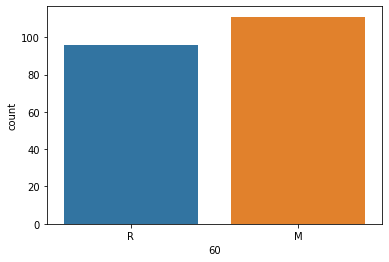

In [7]:
sns.countplot(x=60,data=son)

In [8]:
x=son.iloc[:,:-1]
y=son[60]

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [10]:
x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
x=pca.fit_transform(x)

In [12]:
def random(alg,x,y):
    r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_state)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        if accuracy > r_score:
            r_score=accuracy
            final_r=r_state
    print(accuracy,"at",final_r)

In [13]:
from sklearn.linear_model import LogisticRegression,Lasso,Ridge

In [14]:
import warnings
warnings.filterwarnings('ignore')
lr=LogisticRegression()
random(lr,x,y)

0.7246376811594203 at 84


In [15]:
def metrics(y_test,pred):
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=84)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
metrics(y_test,pred)

0.8695652173913043
[[36  1]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        37
           1       0.96      0.75      0.84        32

    accuracy                           0.87        69
   macro avg       0.89      0.86      0.87        69
weighted avg       0.88      0.87      0.87        69



In [17]:
lrscore=cross_val_score(lr,x,y,cv=5)
print(lrscore.mean())
print(lrscore.std())

0.6158820192853092
0.1849911964630031


In [18]:
l=Lasso()
alphavalue={'alpha':[1,0.1,0.001,0.001,0]}
grd=GridSearchCV(estimator=l,param_grid=alphavalue)
grd.fit(x_train,y_train)
print(grd.best_score_)
print(grd.best_params_)

0.26546607271399175
{'alpha': 0.001}


In [19]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.44481395874738805

In [20]:
r=Ridge()
alphavalue={'alpha':[1,0.1,0.001,0.001,0]}
grd=GridSearchCV(estimator=r,param_grid=alphavalue)
grd.fit(x_train,y_train)
print(grd.best_score_)
print(grd.best_params_)

0.2761766317545346
{'alpha': 1}


In [21]:
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.436242709875732

In [22]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob=lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

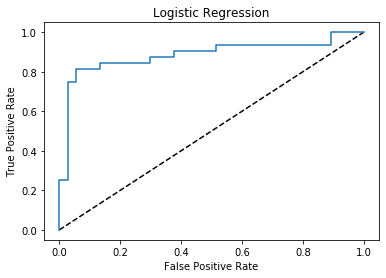

In [23]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [24]:
roc_score=roc_auc_score(y_test,pred)
print(roc_score)

0.8614864864864865


In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
random(dtc,x,y)

0.7246376811594203 at 50


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=71)
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
metrics(y_test,pred)

0.782608695652174
[[34  3]
 [12 20]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        37
           1       0.87      0.62      0.73        32

    accuracy                           0.78        69
   macro avg       0.80      0.77      0.77        69
weighted avg       0.80      0.78      0.78        69



In [27]:
dtscore=cross_val_score(dtc,x,y,cv=5)
print(dtscore.mean())
print(dtscore.std())

0.5329551900170164
0.10652327423744089


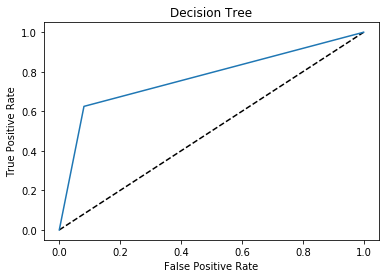

In [28]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree')
plt.show()

In [29]:
roc_score=roc_auc_score(y_test,pred)
print(roc_score)

0.7719594594594594


In [30]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
random(gnb,x,y)

0.7101449275362319 at 58


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=58)
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
metrics(y_test,pred)

0.8840579710144928
[[36  5]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        41
           1       0.83      0.89      0.86        28

    accuracy                           0.88        69
   macro avg       0.88      0.89      0.88        69
weighted avg       0.89      0.88      0.88        69



In [32]:
gnbscore=cross_val_score(gnb,x,y,cv=5)
print(gnbscore.mean())
print(gnbscore.std())

0.5176403857061826
0.10119255039742743


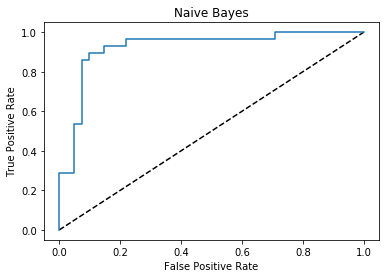

In [33]:
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes')
plt.show()

In [34]:
roc_score=roc_auc_score(y_test,pred)
print(roc_score)

0.8854529616724738


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
random(knn,x,y)

0.7681159420289855 at 71


In [36]:
parameters={'n_neighbors':range(1,40)}
grid = GridSearchCV(knn,parameters)
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 2}

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=71)

In [38]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
metrics(y_test,pred)

0.8405797101449275
[[36  1]
 [10 22]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.87        37
           1       0.96      0.69      0.80        32

    accuracy                           0.84        69
   macro avg       0.87      0.83      0.83        69
weighted avg       0.86      0.84      0.84        69



In [39]:
knnscore=cross_val_score(knn,x,y,cv=5)
print(knnscore.mean())
print(knnscore.std())

0.5794668179239932
0.13013182370000184


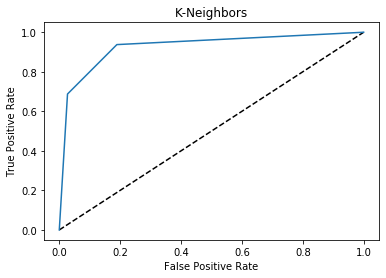

In [40]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Neighbors')
plt.show()

In [41]:
roc_score=roc_auc_score(y_test,pred)
roc_score

0.8302364864864865

In [42]:
from sklearn.svm import SVC
svm=SVC()
random(svm,x,y)

0.6521739130434783 at 58


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=58)
parameters={'kernel':['rbf','linear'],"C":[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(svm,parameters)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.7463768115942029
{'C': 10, 'kernel': 'rbf'}


In [44]:
svm=SVC(kernel='rbf',probability=True)
svm.fit(x_train,y_train)
pred=svm.predict(x_test)
metrics(y_test,pred)

0.8260869565217391
[[36  5]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.81      0.75      0.78        28

    accuracy                           0.83        69
   macro avg       0.82      0.81      0.82        69
weighted avg       0.83      0.83      0.82        69



In [45]:
svmscore=cross_val_score(svm,x,y,cv=5)
print(svmscore.mean())
print(svmscore.std())

0.5568916619398752
0.17140384371134026


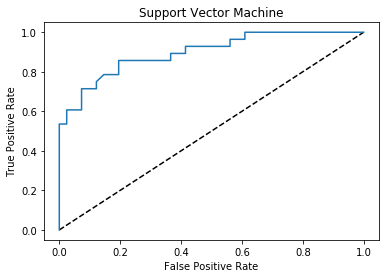

In [46]:
y_pred_prob=svm.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine')
plt.show()

In [47]:
roc_score=roc_auc_score(y_test,pred)

In [48]:
print(roc_score)

0.8140243902439025


In [49]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [50]:
rf=RandomForestClassifier()
random(rf,x,y)

0.8115942028985508 at 81


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=55)
parameters={'n_estimators':[10,100,500]}
gd=GridSearchCV(rf,parameters)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

0.7463768115942029
{'n_estimators': 100}


In [52]:
rf=RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
metrics(y_test,pred)

0.7971014492753623
[[34  5]
 [ 9 21]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        39
           1       0.81      0.70      0.75        30

    accuracy                           0.80        69
   macro avg       0.80      0.79      0.79        69
weighted avg       0.80      0.80      0.79        69



In [53]:
rfscore=cross_val_score(rf,x,y,cv=5)
print(rfscore.mean())
print(rfscore.std())

0.5129892229154849
0.14984381123466745


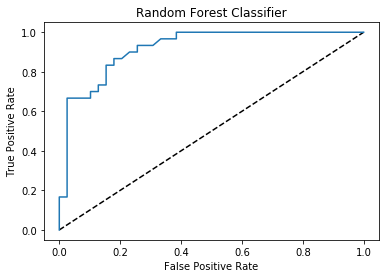

In [54]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [55]:
gbc=GradientBoostingClassifier()
random(gbc,x,y)

0.7971014492753623 at 50


In [56]:
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gbc=GradientBoostingClassifier()
grid=GridSearchCV(gbc, parameters)
grid.fit(x,y)
grid.best_params_

{'learning_rate': 0.001, 'n_estimators': 1000}

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=50)
gbc=GradientBoostingClassifier(learning_rate=0.001,n_estimators=1000)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
metrics(y_test,pred)

0.8695652173913043
[[36  5]
 [ 4 24]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        41
           1       0.83      0.86      0.84        28

    accuracy                           0.87        69
   macro avg       0.86      0.87      0.87        69
weighted avg       0.87      0.87      0.87        69



In [58]:
gbcscore=cross_val_score(gbc,x,y,cv=5)
print(gbcscore.mean())
print(gbcscore.std())

0.5817356778218945
0.14402641498820226


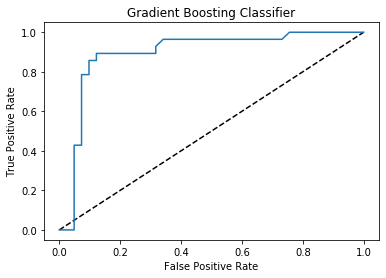

In [59]:
y_pred_prob=gbc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier')
plt.show()

In [60]:
roc_score=roc_auc_score(y_test,pred)

In [61]:
print(roc_score)

0.8675958188153311


From the above algorithm,we find out that random forest gives the most best accuracy at random state of 81

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=55)
parameters={'n_estimators':[10,100,500]}
gd=GridSearchCV(rf,parameters)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

0.7536231884057971
{'n_estimators': 500}


In [63]:
rf=RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
metrics(y_test,pred)

0.8115942028985508
[[35  4]
 [ 9 21]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.84        39
           1       0.84      0.70      0.76        30

    accuracy                           0.81        69
   macro avg       0.82      0.80      0.80        69
weighted avg       0.81      0.81      0.81        69



In [64]:
rfscore=cross_val_score(rf,x,y,cv=5)
print(rfscore.mean())
print(rfscore.std())

0.532274532047646
0.15879045179759552


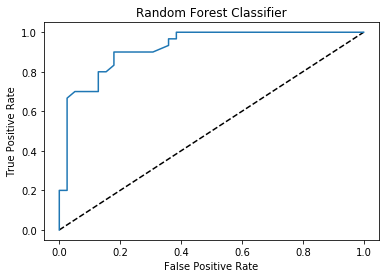

In [65]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [66]:
roc_score=roc_auc_score(y_test,pred)
print(roc_score)

0.7987179487179487


In [67]:
from sklearn.externals import joblib
joblib.dump(rf,'rf_sonar.pkl')

['rf_sonar.pkl']